# Data Science 1 Final Project CODE

In [ ]:

import datetime
from datetime import timedelta
import itertools
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

import fastf1
import fastf1.plotting
from fastf1.core import Laps

import sklearn
from sklearn import linear_model
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import (
    LinearRegression, Lasso, Ridge, ElasticNet,
    LogisticRegression, lasso_path, enet_path
)
from sklearn.metrics import (
    mean_squared_error, accuracy_score, f1_score,
    classification_report, confusion_matrix, r2_score
)
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.model_selection import (
    train_test_split, GridSearchCV, RandomizedSearchCV,
    cross_val_score, cross_val_predict, KFold
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
)

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import loguniform
from ISLP import load_data
from timple.timedelta import strftimedelta

## Timing conversion experimentaiton 

In [2]:
def format_timedelta(td):
    # Extract days, seconds, and microseconds
    days, seconds, microseconds = td.days, td.seconds, td.microseconds
    
    # Calculate total seconds (including days)
    total_seconds = days * 24 * 3600 + seconds
    
    # Divide total seconds into hours, minutes, and seconds
    hours, remainder = divmod(total_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    
    # Format hours and minutes as two-digit strings
    formatted_hours = f"{hours:02d}"
    formatted_minutes = f"{minutes:02d}"
    formatted_seconds = f"{seconds:02d}"
    
    return f"{formatted_hours}:{formatted_minutes}:{formatted_seconds}"

# Example usage:
my_timedelta = timedelta(days=3, hours=2, minutes=30, seconds=15)
formatted_time = format_timedelta(my_timedelta)
print(formatted_time)  # Output: "74:30:15"

74:30:15


## First Practice 1 (FP1)

In [3]:
# fp1 

session_FP1 = fastf1.get_session(2023, 'Singapore', 'FP1')
session_FP1.event
FP1=session_FP1.load(telemetry=True)
# get the results DATAFRAME
FP1_results_df=session_FP1.results # create a dataframe of the results
#display(FP1_results_df)
FP1_all_lap_df=session_FP1.laps
#display(FP1_all_lap_df)
#sns.boxenplot(y=FP1_all_lap_df['Driver'], x=FP1_all_lap_df['LapTime'], palette='magma')
#FP1_all_lap_df.info()
display(FP1_all_lap_df)


req         WARNING 	DEFAULT CACHE ENABLED! (981.13 MB) /Users/dannysatterthwaite/Library/Caches/fastf1
core           INFO 	Loading data for Singapore Grand Prix - Practice 1 [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '31', '4', '40', '44', '55', '63', '77', '81']


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:18:40.371000,VER,1,NaT,1.0,1.0,0 days 00:16:30.560000,NaT,NaT,0 days 00:00:46.385000,...,True,Red Bull Racing,0 days 00:16:30.560000,2023-09-15 09:31:30.578,1,NaN,False,,False,False
1,0 days 00:20:18.540000,VER,1,0 days 00:01:38.169000,2.0,1.0,NaT,NaT,0 days 00:00:28.709000,0 days 00:00:41.723000,...,True,Red Bull Racing,0 days 00:18:40.371000,2023-09-15 09:33:40.389,1,NaN,False,,False,True
2,0 days 00:22:58.146000,VER,1,NaT,3.0,1.0,NaT,NaT,0 days 00:00:50.422000,0 days 00:01:10.231000,...,True,Red Bull Racing,0 days 00:20:18.540000,2023-09-15 09:35:18.558,1,NaN,False,,False,False
3,0 days 00:24:34.567000,VER,1,0 days 00:01:36.421000,4.0,1.0,NaT,NaT,0 days 00:00:28.453000,0 days 00:00:40.888000,...,True,Red Bull Racing,0 days 00:22:58.146000,2023-09-15 09:37:58.164,1,NaN,False,,False,True
4,0 days 00:27:15.360000,VER,1,NaT,5.0,1.0,NaT,NaT,0 days 00:00:49.754000,0 days 00:01:08.102000,...,True,Red Bull Racing,0 days 00:24:34.567000,2023-09-15 09:39:34.585,1,NaN,False,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,0 days 01:13:13.553000,PIA,81,0 days 00:01:39.270000,18.0,4.0,NaT,NaT,0 days 00:00:28.892000,0 days 00:00:42.368000,...,False,McLaren,0 days 01:11:34.283000,2023-09-15 10:26:34.301,2,NaN,False,,False,True
471,0 days 01:14:52.622000,PIA,81,0 days 00:01:39.069000,19.0,4.0,NaT,NaT,0 days 00:00:28.705000,0 days 00:00:42.598000,...,False,McLaren,0 days 01:13:13.553000,2023-09-15 10:28:13.571,1,NaN,False,,False,True
472,0 days 01:16:32.162000,PIA,81,0 days 00:01:39.540000,20.0,4.0,NaT,NaT,0 days 00:00:28.920000,0 days 00:00:42.783000,...,False,McLaren,0 days 01:14:52.622000,2023-09-15 10:29:52.640,1,NaN,False,,False,True
473,0 days 01:18:50.760000,PIA,81,0 days 00:02:18.598000,21.0,4.0,NaT,NaT,0 days 00:00:32.295000,0 days 00:00:57.475000,...,False,McLaren,0 days 01:16:32.162000,2023-09-15 10:31:32.180,1,NaN,False,,False,True


## First Practice 2 (FP2)

In [4]:
# fp2 

session_FP2= fastf1.get_session(2023, 'Singapore',  'FP2')
session_FP2.event
FP2=session_FP2.load(telemetry=True)

# get the results DATAFRAME
FP2_results_df=session_FP2.results # create a dataframe of the results
display(FP2_results_df)

FP2_all_lap_df=session_FP2.laps
FP2_all_lap_df


core           INFO 	Loading data for Singapore Grand Prix - Practice 2 [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '31', '4', '40', '44', '55', '63', '77', '81']


,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
10,10,P GASLY,GAS,gasly,Alpine,2293D1,alpine,Pierre,Gasly,Pierre Gasly,...,FRA,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
11,11,S PEREZ,PER,perez,Red Bull Racing,3671C6,red_bull,Sergio,Perez,Sergio Perez,...,MEX,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
14,14,F ALONSO,ALO,alonso,Aston Martin,358C75,aston_martin,Fernando,Alonso,Fernando Alonso,...,ESP,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
16,16,C LECLERC,LEC,leclerc,Ferrari,F91536,ferrari,Charles,Leclerc,Charles Leclerc,...,MON,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
18,18,L STROLL,STR,stroll,Aston Martin,358C75,aston_martin,Lance,Stroll,Lance Stroll,...,CAN,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
2,2,L SARGEANT,SAR,sargeant,Williams,37BEDD,williams,Logan,Sargeant,Logan Sargeant,...,USA,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
20,20,K MAGNUSSEN,MAG,kevin_magnussen,Haas F1 Team,B6BABD,haas,Kevin,Magnussen,Kevin Magnussen,...,DEN,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
22,22,Y TSUNODA,TSU,tsunoda,AlphaTauri,5E8FAA,alphatauri,Yuki,Tsunoda,Yuki Tsunoda,...,JPN,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
23,23,A ALBON,ALB,albon,Williams,37BEDD,williams,Alexander,Albon,Alexander Albon,...,THA,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:18:36.866000,VER,1,NaT,1.0,1.0,0 days 00:16:25.717000,NaT,NaT,0 days 00:00:49.143000,...,True,Red Bull Racing,0 days 00:16:25.717000,2023-09-15 13:01:27.121,1,NaN,False,,False,False
1,0 days 00:20:11.932000,VER,1,0 days 00:01:35.066000,2.0,1.0,NaT,NaT,0 days 00:00:27.936000,0 days 00:00:40.383000,...,True,Red Bull Racing,0 days 00:18:36.866000,2023-09-15 13:03:38.270,1,NaN,False,,False,True
2,0 days 00:23:12.398000,VER,1,NaT,3.0,1.0,NaT,NaT,0 days 00:01:00.148000,0 days 00:01:19.129000,...,True,Red Bull Racing,0 days 00:20:11.932000,2023-09-15 13:05:13.336,1,NaN,False,,False,False
3,0 days 00:24:46.599000,VER,1,0 days 00:01:34.201000,4.0,1.0,NaT,NaT,0 days 00:00:27.828000,0 days 00:00:39.802000,...,True,Red Bull Racing,0 days 00:23:12.398000,2023-09-15 13:08:13.802,1,NaN,False,,False,True
4,0 days 00:27:45.413000,VER,1,NaT,5.0,1.0,NaT,NaT,0 days 00:00:56.387000,0 days 00:01:12.133000,...,True,Red Bull Racing,0 days 00:24:46.599000,2023-09-15 13:09:48.003,1,NaN,False,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,0 days 01:11:36.268000,PIA,81,0 days 00:01:40.339000,19.0,4.0,NaT,NaT,0 days 00:00:28.884000,0 days 00:00:43.400000,...,False,McLaren,0 days 01:09:55.929000,2023-09-15 13:54:57.333,1,NaN,False,,False,True
471,0 days 01:13:22.540000,PIA,81,0 days 00:01:46.272000,20.0,4.0,NaT,NaT,0 days 00:00:28.877000,0 days 00:00:49.429000,...,False,McLaren,0 days 01:11:36.268000,2023-09-15 13:56:37.672,1,NaN,False,,False,True
472,0 days 01:15:02.107000,PIA,81,0 days 00:01:39.567000,21.0,4.0,NaT,NaT,0 days 00:00:28.984000,0 days 00:00:42.630000,...,False,McLaren,0 days 01:13:22.540000,2023-09-15 13:58:23.944,1,NaN,False,,False,True
473,0 days 01:16:55.383000,PIA,81,0 days 00:01:53.276000,22.0,4.0,NaT,NaT,0 days 00:00:29.685000,0 days 00:00:45.189000,...,False,McLaren,0 days 01:15:02.107000,2023-09-15 14:00:03.511,1,NaN,False,,False,True


## First Pratice 3 (FP3)

In [5]:
# fp3

session_FP3= fastf1.get_session(2023, 'Singapore',  'FP3')
session_FP3.event
FP3=session_FP3.load(telemetry=True)

# get the results DATAFRAME
FP3_results_df=session_FP3.results # create a dataframe of the results
display(FP3_results_df)

FP3_all_lap_df=session_FP3.laps
FP3_all_lap_df

core           INFO 	Loading data for Singapore Grand Prix - Practice 3 [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '31', '4', '40', '44', '55', '63', '77', '81']


,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
10,10,P GASLY,GAS,gasly,Alpine,2293D1,alpine,Pierre,Gasly,Pierre Gasly,...,FRA,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
11,11,S PEREZ,PER,perez,Red Bull Racing,3671C6,red_bull,Sergio,Perez,Sergio Perez,...,MEX,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
14,14,F ALONSO,ALO,alonso,Aston Martin,358C75,aston_martin,Fernando,Alonso,Fernando Alonso,...,ESP,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
16,16,C LECLERC,LEC,leclerc,Ferrari,F91536,ferrari,Charles,Leclerc,Charles Leclerc,...,MON,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
18,18,L STROLL,STR,stroll,Aston Martin,358C75,aston_martin,Lance,Stroll,Lance Stroll,...,CAN,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
2,2,L SARGEANT,SAR,sargeant,Williams,37BEDD,williams,Logan,Sargeant,Logan Sargeant,...,USA,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
20,20,K MAGNUSSEN,MAG,kevin_magnussen,Haas F1 Team,B6BABD,haas,Kevin,Magnussen,Kevin Magnussen,...,DEN,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
22,22,Y TSUNODA,TSU,tsunoda,AlphaTauri,5E8FAA,alphatauri,Yuki,Tsunoda,Yuki Tsunoda,...,JPN,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN
23,23,A ALBON,ALB,albon,Williams,37BEDD,williams,Alexander,Albon,Alexander Albon,...,THA,NaN,,NaN,NaT,NaT,NaT,NaT,,NaN


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:20:38.087000,VER,1,NaT,1.0,1.0,0 days 00:18:39.288000,NaT,NaT,0 days 00:00:50.121000,...,True,Red Bull Racing,0 days 00:18:39.288000,2023-09-16 09:33:39.334,1,NaN,False,,False,False
1,0 days 00:22:12.489000,VER,1,0 days 00:01:34.402000,2.0,1.0,NaT,NaT,0 days 00:00:27.663000,0 days 00:00:40.099000,...,True,Red Bull Racing,0 days 00:20:38.087000,2023-09-16 09:35:38.133,1,NaN,False,,False,True
2,0 days 00:25:18.612000,VER,1,NaT,3.0,1.0,NaT,0 days 00:25:10.893000,0 days 00:00:51.496000,0 days 00:01:18.697000,...,True,Red Bull Racing,0 days 00:22:12.489000,2023-09-16 09:37:12.535,1,NaN,False,,False,False
3,0 days 00:27:36.136000,VER,1,0 days 00:02:17.524000,4.0,2.0,0 days 00:25:35.221000,NaT,0 days 00:00:59.276000,0 days 00:00:48.608000,...,False,Red Bull Racing,0 days 00:25:18.612000,2023-09-16 09:40:18.658,1,NaN,False,,False,False
4,0 days 00:29:09.796000,VER,1,0 days 00:01:33.660000,5.0,2.0,NaT,NaT,0 days 00:00:27.440000,0 days 00:00:39.808000,...,False,Red Bull Racing,0 days 00:27:36.136000,2023-09-16 09:42:36.182,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,0 days 01:07:10.986000,PIA,81,0 days 00:01:33.261000,14.0,4.0,NaT,NaT,0 days 00:00:27.228000,0 days 00:00:39.688000,...,False,McLaren,0 days 01:05:37.725000,2023-09-16 10:20:37.771,1,NaN,False,,False,True
390,0 days 01:09:11.816000,PIA,81,0 days 00:02:00.830000,15.0,4.0,NaT,0 days 01:09:03.942000,0 days 00:00:32.254000,0 days 00:00:50.373000,...,False,McLaren,0 days 01:07:10.986000,2023-09-16 10:22:11.032,1,NaN,False,,False,False
391,0 days 01:16:24.749000,PIA,81,NaT,16.0,5.0,0 days 01:14:30.501000,NaT,NaT,0 days 00:00:44.783000,...,False,McLaren,0 days 01:09:11.816000,2023-09-16 10:24:11.862,1,NaN,False,,False,False
392,0 days 01:18:51.187000,PIA,81,0 days 00:02:26.438000,17.0,5.0,NaT,NaT,0 days 00:00:38.422000,0 days 00:00:51.420000,...,False,McLaren,0 days 01:16:24.749000,2023-09-16 10:31:24.795,1,NaN,False,,False,True


## Qualifying

In [6]:
session_quali = fastf1.get_session(2023, 'Singapore',  'Q')
session_quali.event
qauli=session_quali.load(telemetry=True)

# get the results DATAFRAME
quali_results_df=session_quali.results # create a dataframe of the results
#display(quali_results_df)

quali_all_lap_df=session_quali.laps
display(quali_all_lap_df)

quali_all_lap_df.info()

core           INFO 	Loading data for Singapore Grand Prix - Qualifying [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '63', '16', '4', '44', '20', '14', '31', '27', '40', '1', '10', '11', '23', '22', '77', '81', '2', '24', '18']


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:18:13.606000,SAI,55,NaT,1.0,1.0,0 days 00:16:01.998000,NaT,NaT,0 days 00:00:51.737000,...,True,Ferrari,0 days 00:16:01.998000,2023-09-16 13:01:02.637,1,NaN,False,,False,False
1,0 days 00:19:46.571000,SAI,55,0 days 00:01:32.965000,2.0,1.0,NaT,NaT,0 days 00:00:27.296000,0 days 00:00:39.411000,...,True,Ferrari,0 days 00:18:13.606000,2023-09-16 13:03:14.245,1,NaN,False,,False,True
2,0 days 00:22:28.473000,SAI,55,NaT,3.0,1.0,NaT,NaT,0 days 00:00:45.025000,0 days 00:01:08.058000,...,True,Ferrari,0 days 00:19:46.571000,2023-09-16 13:04:47.210,1,NaN,False,,False,False
3,0 days 00:24:49.134000,SAI,55,0 days 00:02:20.661000,4.0,1.0,NaT,NaT,0 days 00:00:47.129000,0 days 00:00:58.322000,...,True,Ferrari,0 days 00:22:28.473000,2023-09-16 13:07:29.112,1,NaN,False,,False,True
4,0 days 00:26:21.473000,SAI,55,0 days 00:01:32.339000,5.0,1.0,NaT,NaT,0 days 00:00:27.074000,0 days 00:00:39.093000,...,True,Ferrari,0 days 00:24:49.134000,2023-09-16 13:09:49.773,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0 days 00:24:42.434000,STR,18,NaT,4.0,1.0,NaT,NaT,0 days 00:00:52.172000,0 days 00:00:57.080000,...,True,Aston Martin,0 days 00:22:04.148000,2023-09-16 13:07:04.787,1,NaN,False,,False,False
293,0 days 00:26:15.831000,STR,18,0 days 00:01:33.397000,5.0,1.0,NaT,NaT,0 days 00:00:27.330000,0 days 00:00:39.549000,...,True,Aston Martin,0 days 00:24:42.434000,2023-09-16 13:09:43.073,1,NaN,False,,False,True
294,0 days 00:28:39.317000,STR,18,0 days 00:02:23.486000,6.0,1.0,NaT,0 days 00:27:58.595000,0 days 00:00:30.250000,0 days 00:00:43.468000,...,True,Aston Martin,0 days 00:26:15.831000,2023-09-16 13:11:16.470,1,NaN,False,,False,False
295,0 days 00:32:32.712000,STR,18,NaT,7.0,2.0,0 days 00:30:31.296000,NaT,NaT,0 days 00:00:45.522000,...,True,Aston Martin,0 days 00:28:39.317000,2023-09-16 13:13:39.956,1,NaN,False,,False,False


<class 'fastf1.core.Laps'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                297 non-null    timedelta64[ns]
 1   Driver              297 non-null    object         
 2   DriverNumber        297 non-null    object         
 3   LapTime             171 non-null    timedelta64[ns]
 4   LapNumber           297 non-null    float64        
 5   Stint               297 non-null    float64        
 6   PitOutTime          92 non-null     timedelta64[ns]
 7   PitInTime           92 non-null     timedelta64[ns]
 8   Sector1Time         207 non-null    timedelta64[ns]
 9   Sector2Time         297 non-null    timedelta64[ns]
 10  Sector3Time         286 non-null    timedelta64[ns]
 11  Sector1SessionTime  207 non-null    timedelta64[ns]
 12  Sector2SessionTime  297 non-null    timedelta64[ns]
 13  Sector3SessionTime  286 non-null    timedelta6

## RACE

In [7]:
# race: actionable items (data frames): race_results_df (the race results), race_all_lap_df (all the laps of the race)
session_race = fastf1.get_session(2023, 'Singapore',  'R')


# session.event tells us all the event unfo it is in the event object
session_race.event

# session results. need to call session load
race=session_race.load(telemetry=True)

# get the results DATAFRAME
race_results_df=session_race.results # create a dataframe of the results
#display(race_results_df)


# laps All individual laps of a session can be accessed through the property Session.laps. The laps are represented as Laps object which again is a subclass of a pandas.DataFrame.
session_race.laps # we see that as our session was a race, this is all race laps 
# so we create a laps dataframe

race_all_lap_df=session_race.laps
race_all_lap_df

race_all_lap_df.info()

core           INFO 	Loading data for Singapore Grand Prix - Race [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 18
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 18)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '4', '44', '16', '1', '10', '81', '11', '40', '20', '23', '24', '27', '2', '14', '63', '77', '31', '22', '18']


<class 'fastf1.core.Laps'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                1088 non-null   timedelta64[ns]
 1   Driver              1088 non-null   object         
 2   DriverNumber        1088 non-null   object         
 3   LapTime             1062 non-null   timedelta64[ns]
 4   LapNumber           1088 non-null   float64        
 5   Stint               1088 non-null   float64        
 6   PitOutTime          26 non-null     timedelta64[ns]
 7   PitInTime           25 non-null     timedelta64[ns]
 8   Sector1Time         1065 non-null   timedelta64[ns]
 9   Sector2Time         1084 non-null   timedelta64[ns]
 10  Sector3Time         1084 non-null   timedelta64[ns]
 11  Sector1SessionTime  1065 non-null   timedelta64[ns]
 12  Sector2SessionTime  1084 non-null   timedelta64[ns]
 13  Sector3SessionTime  1084 non-null   timedelt

# Exploritory Data Analysis Section Start

In [8]:
# Prep, creating a list of race finishing order

sorted_names=[]
for index in race_results_df['Position']:
    if pd.isnull(index):  # stroll is missing NaN so need this line
        position_int=20
    else:
        position_int = int(index)
    #display(position_int)
    nm=(race_results_df.iloc[position_int-1,2])
    sorted_names.append(nm)


## EDA PRACTICE

### FP1 LAPtime box plots by driver

<Axes: xlabel='LapTimeSeconds', ylabel='Driver'>

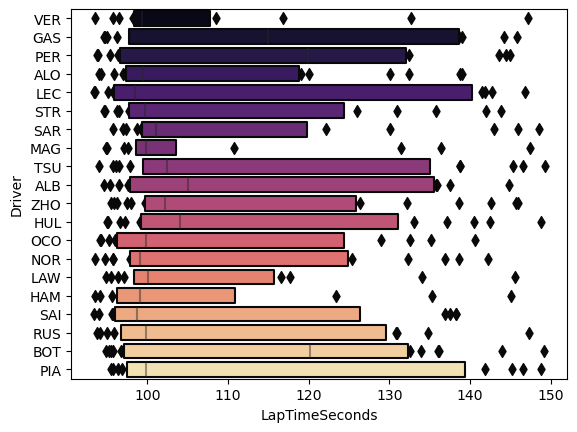

In [9]:
# Convert LapTime column to 'HH:MM:SS' format
FP1_all_lap_df['Converted'] = FP1_all_lap_df['LapTime'].apply(lambda x: str(x).split()[-1])

FP1_all_lap_df['LapTimeSeconds'] = FP1_all_lap_df['LapTime'].dt.total_seconds()

#display(FP1_all_lap_df)

figsize=(10, 10)
sns.boxenplot(y=FP1_all_lap_df['Driver'], x=FP1_all_lap_df['LapTimeSeconds'], palette='magma')

### FP2 Laptime By Driver

<Axes: xlabel='LapTimeSeconds', ylabel='Driver'>

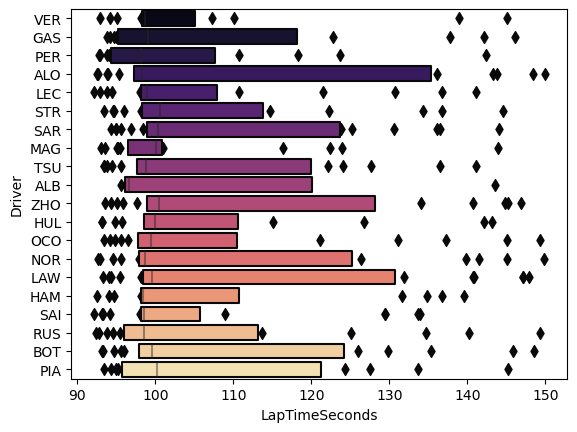

In [10]:
# Convert LapTime column to 'HH:MM:SS' format
FP2_all_lap_df['Converted'] = FP2_all_lap_df['LapTime'].apply(lambda x: str(x).split()[-1])

FP2_all_lap_df['LapTimeSeconds'] = FP2_all_lap_df['LapTime'].dt.total_seconds()

#display(FP1_all_lap_df)

figsize=(10, 10)
sns.boxenplot(y=FP2_all_lap_df['Driver'], x=FP2_all_lap_df['LapTimeSeconds'], palette='magma')

### FP3 Laptime by driver

<Axes: xlabel='LapTimeSeconds', ylabel='Driver'>

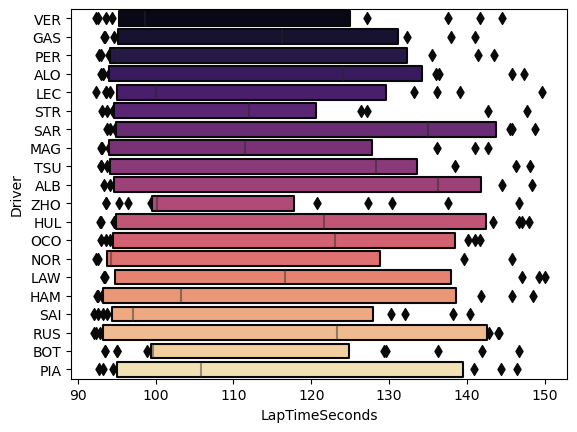

In [11]:
# Convert LapTime column to 'HH:MM:SS' format
FP3_all_lap_df['Converted'] = FP3_all_lap_df['LapTime'].apply(lambda x: str(x).split()[-1])

FP3_all_lap_df['LapTimeSeconds'] = FP3_all_lap_df['LapTime'].dt.total_seconds()

#display(FP1_all_lap_df)

figsize=(10, 10)
sns.boxenplot(y=FP3_all_lap_df['Driver'], x=FP3_all_lap_df['LapTimeSeconds'], palette='magma')

### Fp1 Laptime Vs Stint Vs Compound for Sainz 



<Axes: xlabel='Stint', ylabel='LapTimeSeconds'>

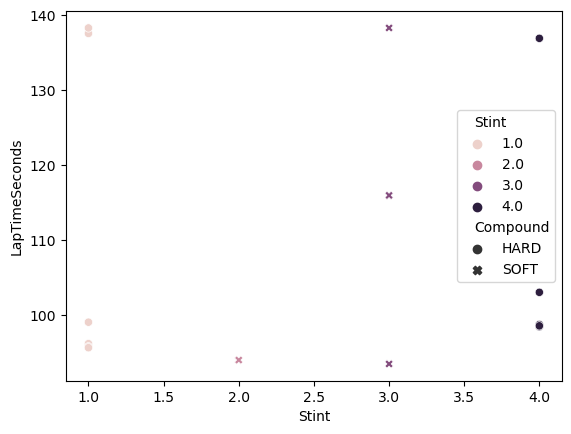

In [12]:

# looks

subset_SAI_FP1 = FP1_all_lap_df[FP1_all_lap_df['Driver'].isin(['SAI'])]

sns.scatterplot(x=subset_SAI_FP1['Stint'], y=subset_SAI_FP1['LapTimeSeconds'], style=subset_SAI_FP1['Compound'], hue=subset_SAI_FP1['Stint'])

#subset_SAI_FP1


# so from this we probably calculate the mean pace per tire compount per practice session then use this to predict qualification and race

# or do it just on an individual driver bassis
# delte ones super high as those are outlaps


### Fp2 Laptime Vs Stint Vs Compound for Sainz 


<Axes: xlabel='Stint', ylabel='LapTimeSeconds'>

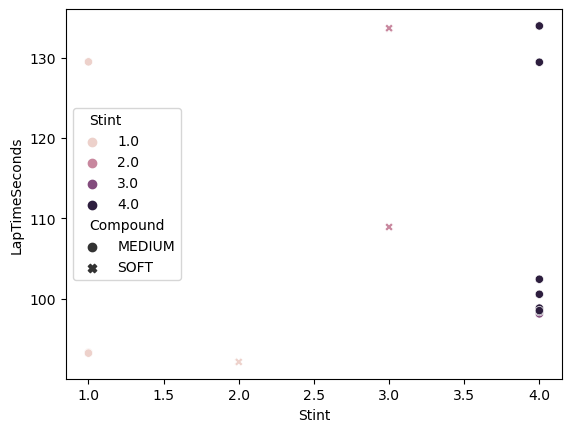

In [13]:
subset_SAI_FP2 = FP2_all_lap_df[FP2_all_lap_df['Driver'].isin(['SAI'])]

sns.scatterplot(x=subset_SAI_FP2['Stint'], y=subset_SAI_FP2['LapTimeSeconds'], style=subset_SAI_FP2['Compound'], hue=subset_SAI_FP1['Stint'])


### Fp3 Laptime Vs Stint Vs Compound for Sainz 

<Axes: xlabel='Stint', ylabel='LapTimeSeconds'>

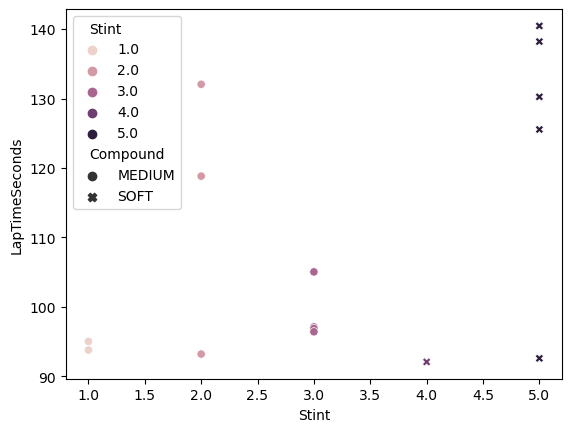

In [14]:
subset_SAI_FP3 = FP3_all_lap_df[FP3_all_lap_df['Driver'].isin(['SAI'])]

sns.scatterplot(x=subset_SAI_FP3['Stint'], y=subset_SAI_FP3['LapTimeSeconds'], style=subset_SAI_FP3['Compound'], hue=subset_SAI_FP3['Stint'])


## EDA Qualifying

- fastest lap is all that matters so hard to do EDA as it's really only 1 lap

### EDA Qualifying, all laps



In [15]:
quali_all_lap_df.info()

<class 'fastf1.core.Laps'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                297 non-null    timedelta64[ns]
 1   Driver              297 non-null    object         
 2   DriverNumber        297 non-null    object         
 3   LapTime             171 non-null    timedelta64[ns]
 4   LapNumber           297 non-null    float64        
 5   Stint               297 non-null    float64        
 6   PitOutTime          92 non-null     timedelta64[ns]
 7   PitInTime           92 non-null     timedelta64[ns]
 8   Sector1Time         207 non-null    timedelta64[ns]
 9   Sector2Time         297 non-null    timedelta64[ns]
 10  Sector3Time         286 non-null    timedelta64[ns]
 11  Sector1SessionTime  207 non-null    timedelta64[ns]
 12  Sector2SessionTime  297 non-null    timedelta64[ns]
 13  Sector3SessionTime  286 non-null    timedelta6

Text(0.5, 1.0, 'Time vs. Driver')

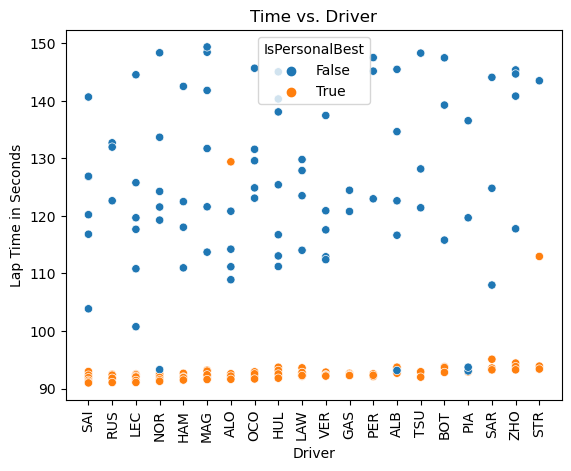

In [16]:
quali_all_lap_df['LapTimeSeconds'] = quali_all_lap_df['LapTime'].dt.total_seconds()

sns.scatterplot(x=quali_all_lap_df['Driver'], y=quali_all_lap_df['LapTimeSeconds'], hue=quali_all_lap_df['IsPersonalBest'])


plt.xlabel('Driver')
plt.xticks(rotation='vertical')
plt.ylabel('Lap Time in Seconds')
plt.title('Time vs. Driver')

## EDA RACE

### EDA RACE box plot by finishing order

<Axes: xlabel='LapTimeSeconds', ylabel='Driver'>

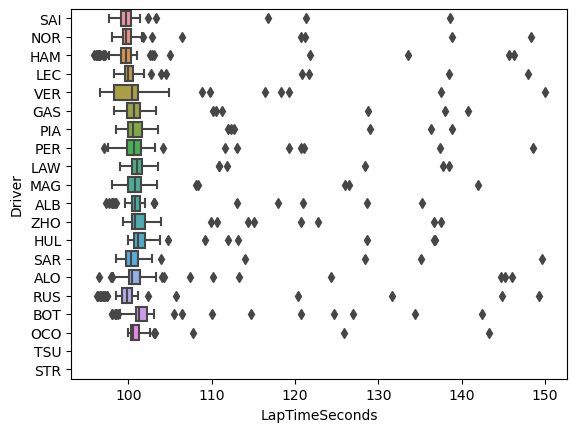

In [17]:
# RACE BOXPLOT # ordered by finishing order

# Convert LapTime column to 'HH:MM:SS' format
race_all_lap_df['Converted'] = race_all_lap_df['LapTime'].apply(lambda x: str(x).split()[-1])

race_all_lap_df['LapTimeSeconds'] = race_all_lap_df['LapTime'].dt.total_seconds()



figsize=(20, 20)
race_Laps_Box=sns.boxplot(y=race_all_lap_df['Driver'], x=race_all_lap_df['LapTimeSeconds'], order=sorted_names)
display(race_Laps_Box)


### EDA race (same as box plots above) just violin plots

<Axes: xlabel='LapTimeSeconds', ylabel='Driver'>

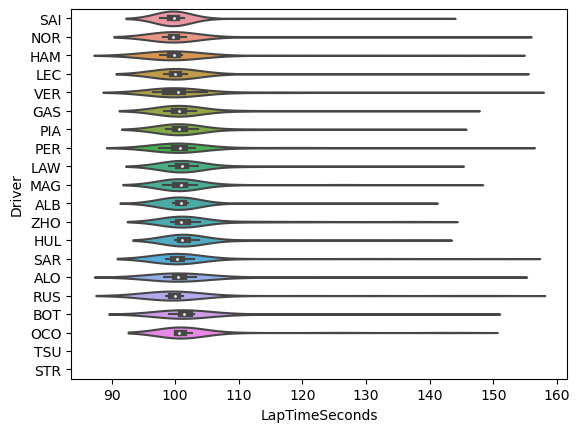

In [18]:
# race violin

race_Laps_Viol=sns.violinplot(y=race_all_lap_df['Driver'], x=race_all_lap_df['LapTimeSeconds'],order=sorted_names)
display(race_Laps_Viol)

### EDA Race Lap time by lap number and tire compound for SAINZ (First) vs Norris (SECOND)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,Converted,LapTimeSeconds
664,0 days 01:04:30.845000,NOR,4,0 days 00:01:46.415000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:44.349000,...,0 days 01:02:44.148000,2023-09-17 12:03:44.659,2,6.0,False,,False,False,00:01:46.415000,106.415
665,0 days 01:06:12.671000,NOR,4,0 days 00:01:41.826000,2.0,1.0,NaT,NaT,0 days 00:00:29.585000,0 days 00:00:43.945000,...,0 days 01:04:30.845000,2023-09-17 12:05:31.356,2,5.0,False,,False,True,00:01:41.826000,101.826
666,0 days 01:07:53.795000,NOR,4,0 days 00:01:41.124000,3.0,1.0,NaT,NaT,0 days 00:00:29.106000,0 days 00:00:43.583000,...,0 days 01:06:12.671000,2023-09-17 12:07:13.182,1,5.0,False,,False,True,00:01:41.124000,101.124
667,0 days 01:09:35.473000,NOR,4,0 days 00:01:41.678000,4.0,1.0,NaT,NaT,0 days 00:00:29.170000,0 days 00:00:43.643000,...,0 days 01:07:53.795000,2023-09-17 12:08:54.306,1,4.0,False,,False,True,00:01:41.678000,101.678
668,0 days 01:11:15.758000,NOR,4,0 days 00:01:40.285000,5.0,1.0,NaT,NaT,0 days 00:00:29.252000,0 days 00:00:42.811000,...,0 days 01:09:35.473000,2023-09-17 12:10:35.984,1,4.0,False,,False,True,00:01:40.285000,100.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0 days 02:42:42.985000,SAI,55,0 days 00:01:39.337000,58.0,2.0,NaT,NaT,0 days 00:00:28.752000,0 days 00:00:42.837000,...,0 days 02:41:03.648000,2023-09-17 13:42:04.159,1,1.0,False,,False,True,00:01:39.337000,99.337
908,0 days 02:44:22.560000,SAI,55,0 days 00:01:39.575000,59.0,2.0,NaT,NaT,0 days 00:00:28.826000,0 days 00:00:42.862000,...,0 days 02:42:42.985000,2023-09-17 13:43:43.496,2,1.0,False,,False,True,00:01:39.575000,99.575
909,0 days 02:46:02.602000,SAI,55,0 days 00:01:40.042000,60.0,2.0,NaT,NaT,0 days 00:00:29.474000,0 days 00:00:42.858000,...,0 days 02:44:22.560000,2023-09-17 13:45:23.071,1,1.0,False,,False,True,00:01:40.042000,100.042
910,0 days 02:47:41.894000,SAI,55,0 days 00:01:39.292000,61.0,2.0,NaT,NaT,0 days 00:00:28.813000,0 days 00:00:42.790000,...,0 days 02:46:02.602000,2023-09-17 13:47:03.113,1,1.0,False,,False,True,00:01:39.292000,99.292


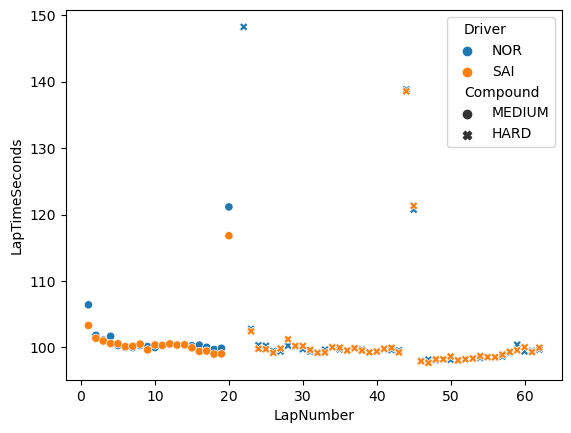

In [19]:
# lec vs VET laptime comparisons encoding tyre compound

subset_SAI_NOR = race_all_lap_df[race_all_lap_df['Driver'].isin(['SAI', 'NOR'])]


sns.scatterplot(x=subset_SAI_NOR['LapNumber'], y=subset_SAI_NOR['LapTimeSeconds'], style=subset_SAI_NOR['Compound'], hue=subset_SAI_NOR['Driver'])
subset_SAI_NOR

### EDA RACE Lap time by lap number and tire compound for SAINZ VS Leclerc (FERRARI Teamates)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,Converted,LapTimeSeconds
248,0 days 01:04:28.974000,LEC,16,0 days 00:01:44.544000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:43.537000,...,0 days 01:02:44.148000,2023-09-17 12:03:44.659,2,3.0,False,,False,False,00:01:44.544000,104.544
249,0 days 01:06:10.312000,LEC,16,0 days 00:01:41.338000,2.0,1.0,NaT,NaT,0 days 00:00:29.385000,0 days 00:00:43.571000,...,0 days 01:04:28.974000,2023-09-17 12:05:29.485,2,2.0,False,,False,True,00:01:41.338000,101.338
250,0 days 01:07:51.064000,LEC,16,0 days 00:01:40.752000,3.0,1.0,NaT,NaT,0 days 00:00:29.579000,0 days 00:00:42.975000,...,0 days 01:06:10.312000,2023-09-17 12:07:10.823,1,2.0,False,,False,True,00:01:40.752000,100.752
251,0 days 01:09:31.725000,LEC,16,0 days 00:01:40.661000,4.0,1.0,NaT,NaT,0 days 00:00:29.427000,0 days 00:00:43.118000,...,0 days 01:07:51.064000,2023-09-17 12:08:51.575,1,2.0,False,,False,True,00:01:40.661000,100.661
252,0 days 01:11:12.053000,LEC,16,0 days 00:01:40.328000,5.0,1.0,NaT,NaT,0 days 00:00:29.405000,0 days 00:00:42.790000,...,0 days 01:09:31.725000,2023-09-17 12:10:32.236,1,2.0,False,,False,True,00:01:40.328000,100.328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0 days 02:42:42.985000,SAI,55,0 days 00:01:39.337000,58.0,2.0,NaT,NaT,0 days 00:00:28.752000,0 days 00:00:42.837000,...,0 days 02:41:03.648000,2023-09-17 13:42:04.159,1,1.0,False,,False,True,00:01:39.337000,99.337
908,0 days 02:44:22.560000,SAI,55,0 days 00:01:39.575000,59.0,2.0,NaT,NaT,0 days 00:00:28.826000,0 days 00:00:42.862000,...,0 days 02:42:42.985000,2023-09-17 13:43:43.496,2,1.0,False,,False,True,00:01:39.575000,99.575
909,0 days 02:46:02.602000,SAI,55,0 days 00:01:40.042000,60.0,2.0,NaT,NaT,0 days 00:00:29.474000,0 days 00:00:42.858000,...,0 days 02:44:22.560000,2023-09-17 13:45:23.071,1,1.0,False,,False,True,00:01:40.042000,100.042
910,0 days 02:47:41.894000,SAI,55,0 days 00:01:39.292000,61.0,2.0,NaT,NaT,0 days 00:00:28.813000,0 days 00:00:42.790000,...,0 days 02:46:02.602000,2023-09-17 13:47:03.113,1,1.0,False,,False,True,00:01:39.292000,99.292


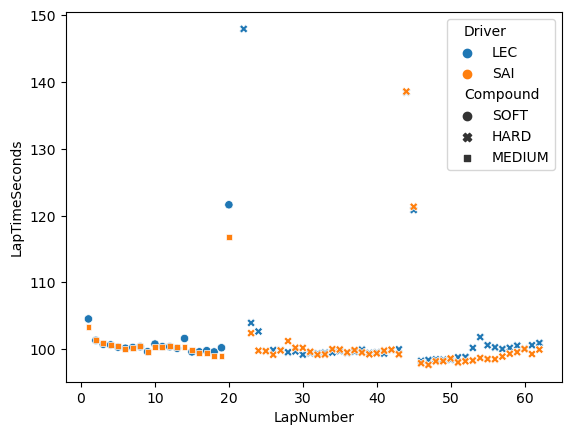

In [20]:
subset_SAI_LEC= race_all_lap_df[race_all_lap_df['Driver'].isin(['LEC', 'SAI'])]


sns.scatterplot(x=subset_SAI_LEC['LapNumber'], y=subset_SAI_LEC['LapTimeSeconds'], style=subset_SAI_LEC['Compound'], hue=subset_SAI_LEC['Driver'])
subset_SAI_LEC

### EDA RACE Laptime by tire compound   

<Axes: xlabel='Compound', ylabel='LapTimeSeconds'>

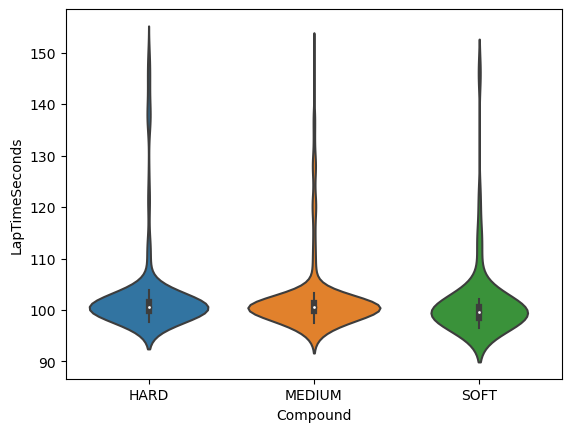

In [21]:
sns.violinplot(y=race_all_lap_df['LapTimeSeconds'], x=race_all_lap_df['Compound'])

### EDA Sector Time Distrobution by driver  

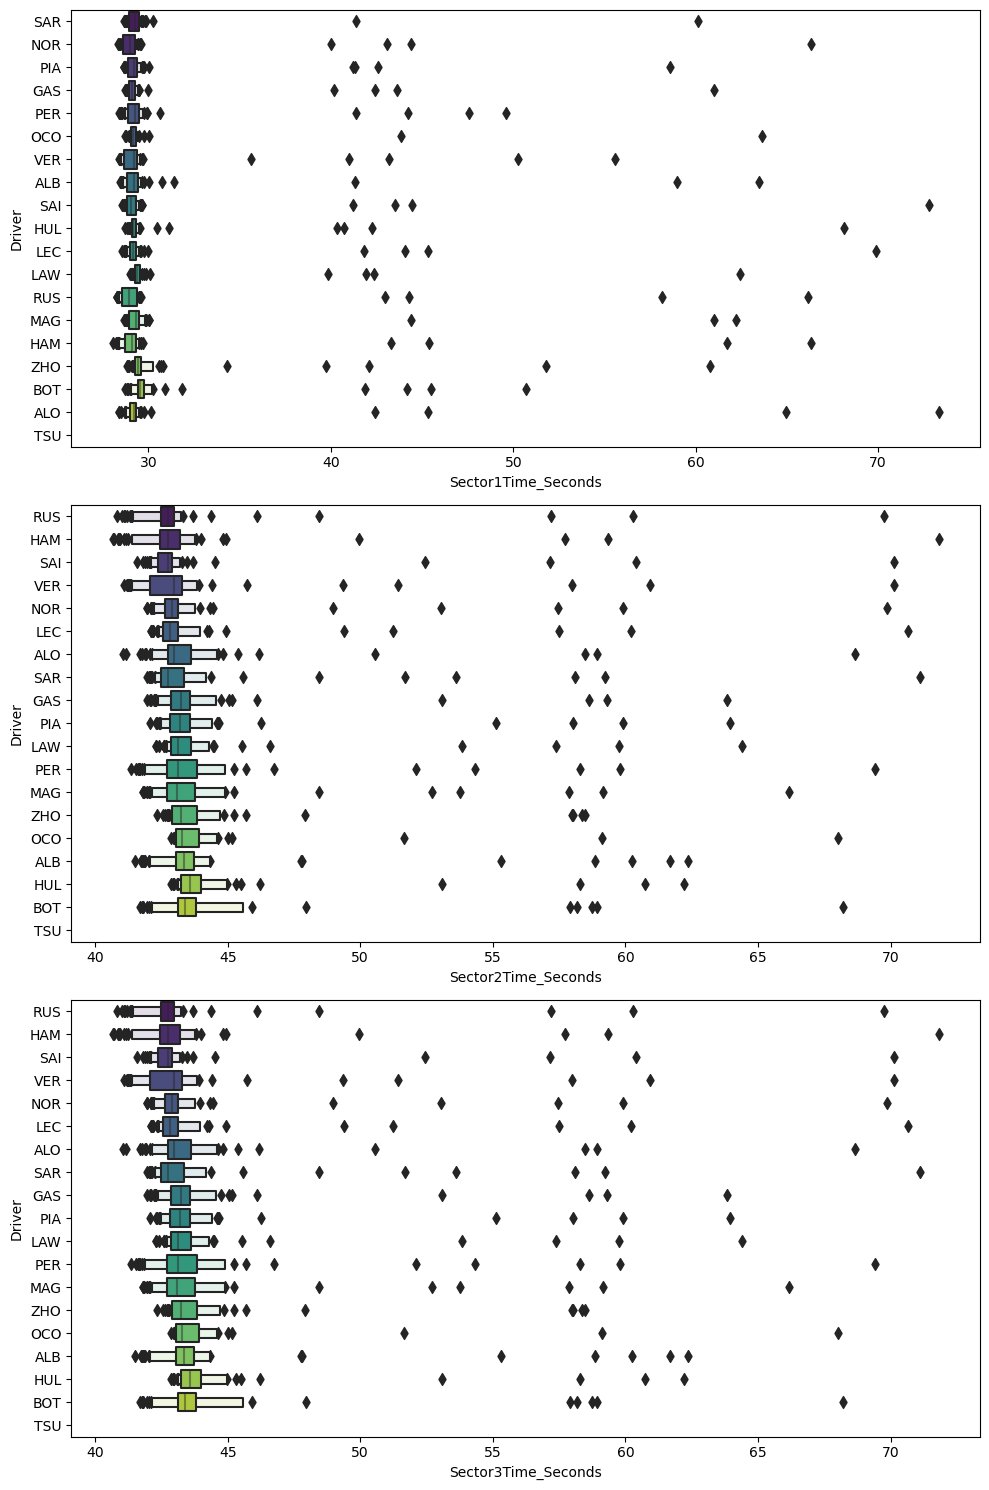

In [22]:
race_all_lap_df['Sector1Time_Seconds'] = race_all_lap_df['Sector1Time'].dt.total_seconds()
race_all_lap_df['Sector2Time_Seconds'] = race_all_lap_df['Sector2Time'].dt.total_seconds()
race_all_lap_df['Sector3Time_Seconds'] = race_all_lap_df['Sector2Time'].dt.total_seconds()



fig, axes = plt.subplots(3, 1, figsize=(10, 15))


# Iterate over each bedroom value
for i, sect in enumerate(['Sector1Time_Seconds', 'Sector2Time_Seconds', 'Sector3Time_Seconds']):
    
    # Filter data for the number of bedrooms
    #data = df_sf_filtered[df_sf_filtered['br'] == BR]
    
    # Calculate mean sector time by driver
    mean_time = race_all_lap_df.groupby('Driver')[sect].mean()
    
    # Find the county with the cheapest and most expensive median price
    min_time_driver = mean_time.idxmin()
    max_time_driver = mean_time.idxmax()
    
    # Sort data by median log price for boxenplot
    sorted_drivers = mean_time.sort_values().index
    sorted_data = race_all_lap_df[race_all_lap_df['Driver'].isin(sorted_drivers)]
    
    # Plot sorted boxenplot for price
    sns.boxenplot(y=race_all_lap_df['Driver'], x=race_all_lap_df[sect], palette='viridis', order=sorted_drivers,ax=axes[i])
    #set_title(f'House Prices for {BR}-BR Houses')
    #set_xlabel(' Log Price ($)')

   

# Adjust layout
#fig.suptitle("Comparison in terms of affordability, both in absolute terms (left column) (in log $) and in cost per building square foot (right column)\n(in log $) " 
            # "foot for 1-BR, 2-BR, and 3-BR houses\n Arranged in order of lowest mean  on top (log price or log price persqft ) to heighest mean on bottom  \n", fontsize=16)
plt.tight_layout()
plt.show()


# Analysis

## Practice

## Qualifying



In [23]:
# merging all the practice laps

df_all_practice=pd.concat([FP1_all_lap_df, FP2_all_lap_df, FP2_all_lap_df], ignore_index=True)

# convert sector times to seconds

df_all_practice['Sector_1_Seconds'] = df_all_practice['Sector1Time'].dt.total_seconds()
df_all_practice['Sector_2_Seconds'] = df_all_practice['Sector2Time'].dt.total_seconds()
df_all_practice['Sector_3_Seconds'] = df_all_practice['Sector3Time'].dt.total_seconds()
df_all_practice.info()

<class 'fastf1.core.Laps'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                1425 non-null   timedelta64[ns]
 1   Driver              1425 non-null   object         
 2   DriverNumber        1425 non-null   object         
 3   LapTime             1050 non-null   timedelta64[ns]
 4   LapNumber           1425 non-null   float64        
 5   Stint               1425 non-null   float64        
 6   PitOutTime          219 non-null    timedelta64[ns]
 7   PitInTime           219 non-null    timedelta64[ns]
 8   Sector1Time         1250 non-null   timedelta64[ns]
 9   Sector2Time         1425 non-null   timedelta64[ns]
 10  Sector3Time         1425 non-null   timedelta64[ns]
 11  Sector1SessionTime  1248 non-null   timedelta64[ns]
 12  Sector2SessionTime  1425 non-null   timedelta64[ns]
 13  Sector3SessionTime  1425 non-null   timedelt

In [24]:
# qualificaiton results
display(quali_results_df)


# Theoretical fastest lap from practice data

# Drop rows where sector times are missing
sector_data = df_all_practice.dropna(subset=['Sector_1_Seconds', 'Sector_2_Seconds', 'Sector_3_Seconds'])

# Group by 'Team' and find the minimum time for each sector
fastest_sectors = sector_data.groupby('Team').agg({
    'Sector1Time': 'min',
    'Sector2Time': 'min',
    'Sector3Time': 'min'
}).reset_index()

# Calculate the theoretical fastest lap by summing the fastest sectors
fastest_sectors['TheoreticalFastestLap'] = fastest_sectors['Sector1Time'] + fastest_sectors['Sector2Time'] + fastest_sectors['Sector3Time']

fastest_sectors[['Team', 'TheoreticalFastestLap']]

# Sort the DataFrame by 'TheoreticalFastestLap'
fastest_sectors_sorted = fastest_sectors.sort_values(by='TheoreticalFastestLap')

# Display the sorted DataFrame
print("the theortical fastest lap time for  each team based on their practice laps is: ")
#print(fastest_sectors_sorted[['Team', 'TheoreticalFastestLap']])

##############

#### Single fastest lap from all practice sessesion by team

quickest_laps = df_all_practice.groupby('Team')['LapTimeSeconds'].min().reset_index()

quickest_laps_sorted = quickest_laps.sort_values(by='LapTimeSeconds')

print("Single fastest lap from all practice sessesion by team is: ")
display(quickest_laps_sorted)



,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
55,55,C SAINZ,SAI,sainz,Ferrari,F91536,ferrari,Carlos,Sainz,Carlos Sainz,...,ESP,1.0,,NaN,0 days 00:01:32.339000,0 days 00:01:31.439000,0 days 00:01:30.984000,NaT,,NaN
63,63,G RUSSELL,RUS,russell,Mercedes,6CD3BF,mercedes,George,Russell,George Russell,...,GBR,2.0,,NaN,0 days 00:01:32.331000,0 days 00:01:31.743000,0 days 00:01:31.056000,NaT,,NaN
16,16,C LECLERC,LEC,leclerc,Ferrari,F91536,ferrari,Charles,Leclerc,Charles Leclerc,...,MON,3.0,,NaN,0 days 00:01:32.406000,0 days 00:01:32.012000,0 days 00:01:31.063000,NaT,,NaN
4,4,L NORRIS,NOR,norris,McLaren,F58020,mclaren,Lando,Norris,Lando Norris,...,GBR,4.0,,NaN,0 days 00:01:32.483000,0 days 00:01:31.951000,0 days 00:01:31.270000,NaT,,NaN
44,44,L HAMILTON,HAM,hamilton,Mercedes,6CD3BF,mercedes,Lewis,Hamilton,Lewis Hamilton,...,GBR,5.0,,NaN,0 days 00:01:32.651000,0 days 00:01:32.019000,0 days 00:01:31.485000,NaT,,NaN
20,20,K MAGNUSSEN,MAG,kevin_magnussen,Haas F1 Team,B6BABD,haas,Kevin,Magnussen,Kevin Magnussen,...,DEN,6.0,,NaN,0 days 00:01:32.242000,0 days 00:01:31.892000,0 days 00:01:31.575000,NaT,,NaN
14,14,F ALONSO,ALO,alonso,Aston Martin,358C75,aston_martin,Fernando,Alonso,Fernando Alonso,...,ESP,7.0,,NaN,0 days 00:01:32.584000,0 days 00:01:31.835000,0 days 00:01:31.615000,NaT,,NaN
31,31,E OCON,OCO,ocon,Alpine,2293D1,alpine,Esteban,Ocon,Esteban Ocon,...,FRA,8.0,,NaN,0 days 00:01:32.369000,0 days 00:01:32.089000,0 days 00:01:31.673000,NaT,,NaN
27,27,N HULKENBERG,HUL,hulkenberg,Haas F1 Team,B6BABD,haas,Nico,Hulkenberg,Nico Hulkenberg,...,GER,9.0,,NaN,0 days 00:01:32.100000,0 days 00:01:31.994000,0 days 00:01:31.808000,NaT,,NaN
40,40,L LAWSON,LAW,lawson,AlphaTauri,5E8FAA,alphatauri,Liam,Lawson,Liam Lawson,...,NZL,10.0,,NaN,0 days 00:01:32.215000,0 days 00:01:32.166000,0 days 00:01:32.268000,NaT,,NaN


the theortical fastest lap time for  each team based on their practice laps is: 
Single fastest lap from all practice sessesion by team is: 


,Team,LapTimeSeconds
4,Ferrari,92.120
7,Mercedes,92.355
3,Aston Martin,92.478
6,McLaren,92.711
8,Red Bull Racing,92.812
5,Haas F1 Team,93.017
0,Alfa Romeo,93.105
1,AlphaTauri,93.285
2,Alpine,93.361
9,Williams,94.327


## Race

### Race analysis DCS ie lap time vs tires vs fuel (lap number)

In [25]:
# prep work (Code for above)

# variables
    # LapTimeSeconds 
    # Stint --> 
    # Lap number -->
    # Compound --> object so need to one hot encode
    # TyreLife --> 
    # FreshTyre --> object so need to one hot encode
 

#race_all_laps_slim=


# encoding
comp_ENC = pd.get_dummies(race_all_lap_df['Compound'], prefix='Compound_')
race_all_lap_df=pd.concat([race_all_lap_df, comp_ENC], axis=1)

tyre_enc= pd.get_dummies(race_all_lap_df['FreshTyre'], prefix='FreshTyre_')
race_all_lap_df=pd.concat([race_all_lap_df, tyre_enc], axis=1)



# list of X columns
X_list=[ "Stint", "LapNumber", "Compound__HARD", "Compound__MEDIUM", "Compound__SOFT", "TyreLife", "FreshTyre__False", "FreshTyre__True"]
Y_List=["LapTimeSeconds"]


# remove rows with missing values
race_all_lap_df_clean=race_all_lap_df.dropna(subset=X_list)
race_all_lap_df_clean=race_all_lap_df.dropna(subset=Y_List)

In [26]:
# Linear regression 

combinations = []
for r in range(1, len(X_list) + 1):
    combinations.extend(itertools.combinations(X_list, r))
    
    k_folds = 5
kf = KFold(n_splits=k_folds)

# Initialize variables to store the best model and score
best_model = None
best_score = float('-inf')
best_mse=10

# Iterate through all combinations of variables
for combo in combinations:
    #display(combo)
    X = race_all_lap_df_clean[list(combo)].values
    y = race_all_lap_df_clean[Y_List].values
    
    # Initialize lists to store scores for each fold
    fold_scores = []
    fold_mse_scores = []
    
    # Perform k-fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Fit a linear regression model for the current combination
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Evaluate the model on the test set
        y_pred = model.predict(X_test)
        fold_scores.append(r2_score(y_test, y_pred))
        fold_mse_scores.append(mean_squared_error(y_test, y_pred))
        avg_mse_score = sum(fold_mse_scores) / len(fold_mse_scores)
    
    # Calculate the average score across all folds
    avg_score = sum(fold_scores) / len(fold_scores)
    
    # Check if the current combination yields a better score
    if avg_score > best_score:
        best_model = LinearRegression().fit(X, y)
        best_score = avg_score
        best_combo = combo
        best_mse=avg_mse_score
    
    print(avg_mse_score)

# Output the best combination and its corresponding model
print("Best combination of variables:", best_combo)
print("Best average R^2 score across", k_folds, "folds:", best_score, "with an MSE of", best_mse)
print("Coefficients:", best_model.coef_)
print("Intercept:", best_model.intercept_)

70.48866401765356
70.07262832336475
70.33933576712627
70.46673677883155
77.39107725130911
70.30486237594288
70.72911530346548
70.72911530346548
70.0973669332388
70.27234513252444
70.39129914533244
76.70441841427244
70.30757808402078
70.55969201235544
70.55969201235543
69.6909752907114
69.81573400737159
75.465416497142
70.11840152792043
70.06670283756942
70.06670283756942
77.21207560367478
77.21207560367476
69.84836134851508
70.55943322876831
70.55943322876831
77.21207560367466
70.08525104597683
70.94733624165113
70.94733624165113
76.38299899309582
80.59279064317955
80.5927906431796
70.4003913150303
70.40039131503029
71.24463976906398
69.63220079715991
69.8401224713217
75.65224333999002
70.34245968643347
70.11021124152856
70.11021124152856
76.45820413642753
76.45820413642744
69.92973076162575
70.40596309074053
70.40596309074053
76.45820413642794
70.20386285667438
70.70719048119808
70.70719048119808
75.93846119466257
79.19620885393438
79.19620885393435
70.33199530262661
70.33199530262661

In [27]:
# polynomial (squared)


# Define the degree of polynomial features
degree = 2  # You can change this to the desired degree of polynomial

# Define the number of folds for cross-validation
k_folds = 5
kf = KFold(n_splits=k_folds)

# Initialize variables to store the best model and score
best_model = None
best_score = float('-inf')

# Iterate through all combinations of variables
for combo in combinations:
    X = race_all_lap_df_clean[list(combo)].values
    y = race_all_lap_df_clean[Y_List].values
    
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    # Initialize lists to store scores for each fold
    fold_r2_scores = []
    fold_mse_scores = []
    
    # Perform k-fold cross-validation
    for train_index, test_index in kf.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Fit a linear regression model for the current combination
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Evaluate the model on the test set
        y_pred = model.predict(X_test)
        
        # Calculate R^2 score and MSE for the current fold
        fold_r2_scores.append(r2_score(y_test, y_pred))
        fold_mse_scores.append(mean_squared_error(y_test, y_pred))
    
    # Calculate the average score across all folds
    avg_r2_score = sum(fold_r2_scores) / len(fold_r2_scores)
    avg_mse_score = sum(fold_mse_scores) / len(fold_mse_scores)
    
    # Check if the current combination yields a better score
    if avg_r2_score > best_score:
        best_model = LinearRegression().fit(X_poly, y)
        best_score = avg_r2_score
        best_combo = combo
    
    # Output scores for the current combination
    #print("Variables:", combo)
    #print("Average R^2 score:", avg_r2_score)
    #print("Average MSE:", avg_mse_score)
    #print("-" * 40)

# Output the best combination and its corresponding model
print("Best combination of variables:", best_combo)
print("Best average R^2 score across", k_folds, "folds:", best_score)
print("Coefficients:", best_model.coef_)
print("Intercept:", best_model.intercept_)



Best combination of variables: ('LapNumber', 'Compound__MEDIUM', 'TyreLife')
Best average R^2 score across 5 folds: 0.04402845256260226
Coefficients: [[ 0.          0.30543119 -1.06221425 -0.58150534 -0.00474772 -0.0197245
  -0.00276345 -1.06221425  0.19537152  0.01619246]]
Intercept: [104.43332138]


In [28]:
# kernel

# Define the kernel function
def kernel_function(X1, X2):
    # Radial basis function (RBF) kernel
    return pairwise_kernels(X1, X2, metric='rbf')

# Define the bandwidth parameter
bandwidth = 0.5

# Define the number of folds for cross-validation
k_folds = 5
kf = KFold(n_splits=k_folds)

# Initialize variables to store the best model and score
best_score = float('-inf')
best_combo = None

# Iterate through all combinations of variables
for combo in combinations:
    X = race_all_lap_df_clean[list(combo)].values
    y = race_all_lap_df_clean[Y_List].values
    
    # Initialize lists to store predicted values and MSE for each fold
    fold_y_pred = []
    fold_mse_scores = []
    
    # Perform k-fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Calculate the kernel matrix
        K = kernel_function(X_train, X_train)
        
        # Calculate the kernel weights
        weights = K.dot(y_train) / np.sum(K, axis=1)
        
        # Predict the target variable for the test set
        K_test = kernel_function(X_test, X_train)
        y_pred = K_test.dot(weights)
        
        # Calculate MSE for the current fold
        fold_y_pred.extend(y_pred)
        #fold_mse_scores.append(mean_squared_error(y_test, y_pred))
    
    # Calculate the average MSE across all folds
    #avg_mse_score = sum(fold_mse_scores) / len(fold_mse_scores)
    
    # Check if the current combination yields a better score
    if avg_mse_score > best_score:
        best_score = avg_mse_score
        best_combo = combo
    
    # Output MSE for the current combination
    #print("Variables:", combo)
    #print("Average MSE:", avg_mse_score)
   # print("-" * 40)

# Output the best combination and its corresponding model
print("Best combination of variables:", best_combo)
print("Best average MSE across", k_folds, "folds:", best_score)

Best combination of variables: ('Stint',)
Best average MSE across 5 folds: 310.51622172494746


### Multiple logistic regression results predicting Next lap pit stop using LapNumber, LapTime, Sector1Time, Sector2Time, Sector3Time, TrackStatus, Position, FreshTyre

In [29]:
### For some reason if I used the race_all_df data up there it does not work si I had to import it 
### modify to read in file
race_all_lap_data= pd.read_csv(r'C:\Users\adujo\OneDrive\Desktop\Data Science I Mikaela\data\race_all_lap.csv')
race_all_lap_data

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\adujo\\OneDrive\\Desktop\\Data Science I Mikaela\\data\\race_all_lap.csv'

In [ ]:



# Create a shifted column for PitInTime to indicate if the next lap is a pit stop lap
race_all_lap_data['NextLapPitStop'] = race_all_lap_data.groupby('Driver')['PitInTime'].shift(-1).notnull().astype(int)

# Convert time columns to total seconds for model fitting
for time_col in ['LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']:
    race_all_lap_data[time_col] = pd.to_timedelta(race_all_lap_data[time_col]).dt.total_seconds()

# Select features and target variable
features = ['LapNumber', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'TrackStatus', 'Position', 'FreshTyre']
X = race_all_lap_data[features].copy()
# Convert boolean to int
X['FreshTyre'] = X['FreshTyre'].astype(int)
y = race_all_lap_data['NextLapPitStop']

# Handle missing values by simple imputation (replacing NaNs with column mean)
X.fillna(X.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


# using statsmodels
#log_reg = sm.Logit(y_train, X_train_scaled).fit() 
#print(log_reg.summary())

# Evaluate the model
predictions = model.predict(X_test_scaled)
report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

(report, conf_matrix)



# Add a constant to the scaled training and testing data for statsmodels
X_train_scaled_sm = sm.add_constant(X_train_scaled)
X_test_scaled_sm = sm.add_constant(X_test_scaled)

# Initialize and fit the logistic regression model using statsmodels
log_reg = sm.Logit(y_train, X_train_scaled_sm).fit()
print(log_reg.summary())

# Predict using statsmodels (return probabilities for the positive class)
pred_prob = log_reg.predict(X_test_scaled_sm)
predictions_sm = (pred_prob > 0.5).astype(int)  # Convert probabilities to binary outcomes

# Evaluate the statsmodels predictions
report_sm = classification_report(y_test, predictions_sm)
conf_matrix_sm = confusion_matrix(y_test, predictions_sm)

(report_sm, conf_matrix_sm)




Optimization terminated successfully.
         Current function value: 0.102807
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:         NextLapPitStop   No. Observations:                  870
Model:                          Logit   Df Residuals:                      861
Method:                           MLE   Df Model:                            8
Date:                Tue, 16 Apr 2024   Pseudo R-squ.:                 0.06071
Time:                        00:25:38   Log-Likelihood:                -89.442
converged:                       True   LL-Null:                       -95.224
Covariance Type:            nonrobust   LLR p-value:                    0.1718
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.6227      1.087     -5.173      0.000      -7.753      -3.492
x1            -0.4652      0

c:\Users\adujo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adujo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adujo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adujo\anaconda3\Lib\site-packages\sklearn\metr

('              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       213\n           1       0.00      0.00      0.00         5\n\n    accuracy                           0.98       218\n   macro avg       0.49      0.50      0.49       218\nweighted avg       0.95      0.98      0.97       218\n',
 array([[213,   0],
        [  5,   0]], dtype=int64))

In [ ]:

# Get the logistic regression coefficients from the model
coefficients = model.coef_[0]

# Calculate odds ratios by exponentiating the coefficients
odds_ratios = np.exp(coefficients)

# Create a DataFrame to view the features alongside their odds ratios
features = ['LapNumber', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'TrackStatus', 'Position', 'FreshTyre']
odds_df = pd.DataFrame({
    'Feature': features,
    'OddsRatio': odds_ratios
})

# Display the DataFrame
print(odds_df)

       Feature  OddsRatio
0    LapNumber   0.733106
1      LapTime   1.280528
2  Sector1Time   0.502163
3  Sector2Time   0.601067
4  Sector3Time   1.007946
5  TrackStatus   1.302299
6     Position   0.925887
7    FreshTyre   0.929977


### Multiple logistic regression results predicting performance drop using LapNumber, LapTime, Sector1Time, Sector2Time, Sector3Time, LapTimeMovingAvg, TrackStatus, Position, FreshTyre

In [ ]:
# Calculate moving averages and performance drop indicator
window_size = 3  # 3-lap moving average
threshold = 0.05  # 5% increase in lap time considered significant

# Calculate the moving average of lap times for each driver
race_all_lap_data['LapTimeMovingAvg'] = race_all_lap_data.groupby('Driver')['LapTime'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# Determine if the current lap time is significantly higher than the moving average
race_all_lap_data['PerformanceDrop'] = ((race_all_lap_data['LapTime'] - race_all_lap_data['LapTimeMovingAvg']) / race_all_lap_data['LapTimeMovingAvg']) > threshold

# Select features and target for the logistic regression model
features_performance_drop = ['LapNumber', 'LapTime', 'LapTimeMovingAvg', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'TrackStatus', 'Position', 'FreshTyre']
X_perf_drop = race_all_lap_data[features_performance_drop].copy()
X_perf_drop['FreshTyre'] = X_perf_drop['FreshTyre'].astype(int)  # Convert boolean to int for modeling
y_perf_drop = race_all_lap_data['PerformanceDrop'].astype(int)

# Handle missing values by simple imputation
X_perf_drop.fillna(X_perf_drop.mean(), inplace=True)



# Calculate VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["features_performance_drop"] = X_perf_drop.columns
vif_data["VIF"] = [variance_inflation_factor(X_perf_drop.values, i) for i in range(X_perf_drop.shape[1])]

print(vif_data)

  features_performance_drop         VIF
0                 LapNumber    3.943778
1                   LapTime  461.131895
2          LapTimeMovingAvg  355.209265
3               Sector1Time  100.896026
4               Sector2Time  638.592248
5               Sector3Time  256.700902
6               TrackStatus    1.477255
7                  Position    4.485919
8                 FreshTyre   14.186105


In [ ]:

# Split the data into training and testing sets for the performance drop prediction
X_perf_drop_train, X_perf_drop_test, y_perf_drop_train, y_perf_drop_test = train_test_split(X_perf_drop, y_perf_drop, test_size=0.2, random_state=42)

# Standardize features
scaler_perf_drop = StandardScaler()
X_perf_drop_train_scaled = scaler_perf_drop.fit_transform(X_perf_drop_train)
X_perf_drop_test_scaled = scaler_perf_drop.transform(X_perf_drop_test)

# Initialize and train the logistic regression model for performance drop prediction
model_perf_drop = LogisticRegression(random_state=42)
model_perf_drop.fit(X_perf_drop_train_scaled, y_perf_drop_train)

# Evaluate the model
predictions_perf_drop = model_perf_drop.predict(X_perf_drop_test_scaled)
report_perf_drop = classification_report(y_perf_drop_test, predictions_perf_drop)
conf_matrix_perf_drop = confusion_matrix(y_perf_drop_test, predictions_perf_drop)

(report_perf_drop, conf_matrix_perf_drop)


from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_perf_drop.columns
vif_data["VIF"] = [variance_inflation_factor(X_perf_drop.values, i) for i in range(X_perf_drop.shape[1])]

print(vif_data)


# # Add a constant to the scaled training and testing data for statsmodels
# X_perf_drop_train_scaled_sm = sm.add_constant(X_perf_drop_train_scaled)
# X_perf_drop_test_scaled_sm = sm.add_constant(X_perf_drop_test_scaled )

# # Initialize and fit the logistic regression model using statsmodels
# log_reg2 = sm.Logit(y_perf_drop_train, X_perf_drop_train_scaled_sm).fit()
# print(log_reg2.summary())

# # Predict using statsmodels (return probabilities for the positive class)
# pred_prob2 = log_reg2.predict(X_perf_drop_test_scaled)
# predictions_sm2 = (pred_prob2 > 0.5).astype(int)  # Convert probabilities to binary outcomes

# # Evaluate the statsmodels predictions
# report_sm2 = classification_report(y_perf_drop_test, predictions_sm2)
# conf_matrix_sm2 = confusion_matrix(y_perf_drop_test, predictions_sm2)

# (report_sm2, conf_matrix_sm2)



# Add a constant to the scaled training and testing data for statsmodels
X_perf_drop_train_scaled_sm = sm.add_constant(X_perf_drop_train_scaled)
X_perf_drop_test_scaled_sm = sm.add_constant(X_perf_drop_test_scaled)

# Initialize and fit the logistic regression model using statsmodels
log_reg_perf_drop = sm.Logit(y_perf_drop_train, X_perf_drop_train_scaled_sm).fit()

# Display the summary of the logistic regression model
print(log_reg_perf_drop.summary())





            feature         VIF
0         LapNumber    3.943778
1           LapTime  461.131895
2  LapTimeMovingAvg  355.209265
3       Sector1Time  100.896026
4       Sector2Time  638.592248
5       Sector3Time  256.700902
6       TrackStatus    1.477255
7          Position    4.485919
8         FreshTyre   14.186105
         Current function value: inf
         Iterations: 35


c:\Users\adujo\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\adujo\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


LinAlgError: Singular matrix

In [ ]:

# Re-run the Lasso model setup, training, evaluation, and display coefficients correctly

# Initialize the logistic regression model with L1 penalty (Lasso)
model_lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Fit the model on the scaled training data
model_lasso.fit(X_perf_drop_train_scaled, y_perf_drop_train)

# Predict on the scaled test data
predictions_lasso = model_lasso.predict(X_perf_drop_test_scaled)

# Generate evaluation metrics
report_lasso = classification_report(y_perf_drop_test, predictions_lasso)
conf_matrix_lasso = confusion_matrix(y_perf_drop_test, predictions_lasso)

# Prepare a DataFrame to display coefficients
coefficients_lasso = model_lasso.coef_[0]

coef_lasso_df = pd.DataFrame({
    'Feature': features_performance_drop,  # Correct feature names from setup
    'Coefficient': coefficients_lasso
})

(report_lasso, conf_matrix_lasso, coef_lasso_df)

print("Classification Report:\n", report_lasso)
print("Confusion Matrix:\n", conf_matrix_lasso)
print("Coefficients:\n", coef_lasso_df)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       209
           1       0.88      0.78      0.82         9

    accuracy                           0.99       218
   macro avg       0.93      0.89      0.91       218
weighted avg       0.99      0.99      0.99       218

Confusion Matrix:
 [[208   1]
 [  2   7]]
Coefficients:
             Feature  Coefficient
0         LapNumber     0.290220
1           LapTime     5.060756
2  LapTimeMovingAvg    -3.748518
3       Sector1Time     0.441098
4       Sector2Time    -0.518651
5       Sector3Time     1.123492
6       TrackStatus     0.170086
7          Position     0.000000
8         FreshTyre     0.000000


In [ ]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, log_loss
import pandas as pd

# Fit the Lasso logistic regression model
model_lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model_lasso.fit(X_perf_drop_train_scaled, y_perf_drop_train)

# Predict and evaluate the model
predictions_lasso = model_lasso.predict(X_perf_drop_test_scaled)
report_lasso = classification_report(y_perf_drop_test, predictions_lasso)
conf_matrix_lasso = confusion_matrix(y_perf_drop_test, predictions_lasso)

# Compute Mean Squared Error
mse = mean_squared_error(y_perf_drop_test, predictions_lasso)

# Calculate log-loss
logloss = log_loss(y_perf_drop_test, model_lasso.predict_proba(X_perf_drop_test_scaled)[:, 1])

# Extract and display coefficients
coefficients_lasso = model_lasso.coef_[0]
coef_lasso_df = pd.DataFrame({
    'Feature': features_performance_drop,
    'Coefficient': coefficients_lasso
})

# Print the classification report, confusion matrix, MSE, and log loss
print("Classification Report:\n", report_lasso)
print("Confusion Matrix:\n", conf_matrix_lasso)
print("Mean Squared Error:", mse)
print("Log Loss:", logloss)
print("Coefficients:\n", coef_lasso_df)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       209
           1       0.88      0.78      0.82         9

    accuracy                           0.99       218
   macro avg       0.93      0.89      0.91       218
weighted avg       0.99      0.99      0.99       218

Confusion Matrix:
 [[208   1]
 [  2   7]]
Mean Squared Error: 0.013761467889908258
Log Loss: 0.017010020561834736
Coefficients:
             Feature  Coefficient
0         LapNumber     0.290220
1           LapTime     5.060756
2  LapTimeMovingAvg    -3.748518
3       Sector1Time     0.441098
4       Sector2Time    -0.518651
5       Sector3Time     1.123492
6       TrackStatus     0.170086
7          Position     0.000000
8         FreshTyre     0.000000
